In [3]:
!pip install folium
!pip install yellowbrick

import folium
import pandas as pd
import numpy as np
import requests
import urllib.request
import geopy
import folium
import json
from geopy.geocoders import Nominatim
#from pandas.io.json import json_normalize
from pandas import json_normalize
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 271 kB 10.2 MB/s eta 0:00:01


In [4]:
#state_names = ["Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Washington,_D.C.", "Delaware", "Florida", "Georgia_(U.S._state)", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North_Carolina", "North_Dakota", "Nebraska", "New_Hampshire", "New_Jersey", "New_Mexico", "Nevada", "New_York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode_Island", "South_Carolina", "South_Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West_Virginia", "Wyoming"]
state_names = ["Connecticut", "Maine", "Massachusetts", "New_Hampshire", "New_York", "Pennsylvania", "Rhode_Island", "Vermont"]

In [5]:
#state_names_parse = ["Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Washington, D.C.", "Delaware", "Florida", "Georgia", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
state_names_parse = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "New York", "Pennsylvania", "Rhode Island", "Vermont"]

In [6]:
dflist = [] #empty list of dataframes

In [7]:
partial_url = "https://en.wikipedia.org/wiki/List_of_botanical_gardens_and_arboretums_in_"

In [8]:
#select appropriate table from URL and add to dflist

for count, n in enumerate(state_names):
    url = (partial_url + state_names[count])
    dfs = pd.read_html(url)
    df = dfs[0]
    df.drop(df.columns.difference(['City','Name','Coordinates']), axis = 1, inplace=True)
    dflist.append(df)

In [9]:
for row in range(len(dflist)):
    dflist[row].dropna(inplace = True)
    dflist[row].reset_index(drop = True, inplace = True)

In [10]:
coFrame = pd.DataFrame()
coFrame = coFrame.reindex(columns = ['name','city','state','latitude','longitude']) 

Gather locations, use Nominatim to get coordinates, add to dataframe

THIS WILL TAKE A FEW MINUTES

In [11]:
cty = []
lat = []
lon = []
name = []
state = []
geolocator = Nominatim(user_agent = "gardens")

for count in range(len(dflist)):
    for city in range(len(dflist[count])):
        address = str(dflist[count].iloc[city]['Name'] + ", " + dflist[count].iloc[city]['City'] + ", " + state_names_parse[count] + ", USA")
        address2 = str(dflist[count].iloc[city]['City'] + ", " + state_names_parse[count] + ", USA")
        #Try to get the exact location. If Nominatim can't find it, then use the coordinates for the city instead.
        try:
            location = geolocator.geocode(address)
        except AttributeError:
            pass
        else:
            location = geolocator.geocode(address2)
        finally:
          if location == None:
            location = geolocator.geocode(address2)
            latitude = location.latitude
            longitude = location.longitude
            cty.append(dflist[count].iloc[city]['City'].split('[')[0])
            lat.append(latitude)
            lon.append(longitude)
            state.append(state_names_parse[count])
            ntemp = (dflist[count].iloc[city]['Name']).split('[')[0] #remove brackets from ends of names
            name.append(ntemp)
          else:
            #print("count: " + str(count) + " city: " + str(city) )
            latitude = location.latitude
            longitude = location.longitude
            cty.append(dflist[count].iloc[city]['City'].split('[')[0])
            lat.append(latitude)
            lon.append(longitude)
            state.append(state_names_parse[count])
            ntemp = (dflist[count].iloc[city]['Name']).split('[')[0] #remove brackets from ends of names
            name.append(ntemp)
        #print(address + ': ' + str(latitude) + ', ' + str(longitude) + ": " + dflist[count].loc[city]['Name'])

In [12]:
tFrame = pd.DataFrame(0, index=np.arange(1), columns=['name','city','state','latitude','longitude'])
tFrame['longitude'].iloc[0] = -73.208360
tFrame['city'].iloc[0] = 'Burlington Area'
tFrame['latitude'].iloc[0] = 44.500708
tFrame['name'].iloc[0] = 'BVT'
tFrame['state'].iloc[0] = 'Vermont'
tFrame

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,name,city,state,latitude,longitude
0,BVT,Burlington Area,Vermont,44.500708,-73.20836


In [13]:
coFrame['longitude'] = lon
coFrame['city'] = cty
coFrame['latitude'] = lat
coFrame['name'] = name
coFrame['state'] = state

In [14]:
coFrame.reset_index(drop = True, inplace = True)
coFrame.iloc[10]

name         Richard Haley Wildlife Gardens
city                                Hampton
state                           Connecticut
latitude                             41.784
longitude                          -72.0548
Name: 10, dtype: object

In [15]:
coFrame.shape

(131, 5)

In [16]:
xFrame = coFrame.append(tFrame)
xFrame.reset_index(drop = True, inplace=True)
xFrame.shape

(132, 5)

Map gardens:

In [17]:
US_Map = folium.Map(location=[42.36, -72.7129], zoom_start = 7)

# add markers to map

for count in range(len(coFrame)):
    #location = coFrame['address']
    latitude = coFrame['latitude'].iloc[count]
    longitude = coFrame['longitude'].iloc[count]
    folium.Marker([latitude, longitude], popup = str(coFrame['name'].iloc[count])).add_to(US_Map)
    
US_Map

Foursquare:

In [18]:
CLIENT_ID = 'YFDSEK12VP5030DAOPBTFGUUDQNEZD24SFIIME5TZBAERCCT' # your Foursquare ID
CLIENT_SECRET = 'UFRR3DWVMCZ0MFSDYDUZBOCJOYMHIZ4LZXBB0WMV0FB3DNWY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 20 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YFDSEK12VP5030DAOPBTFGUUDQNEZD24SFIIME5TZBAERCCT
CLIENT_SECRET:UFRR3DWVMCZ0MFSDYDUZBOCJOYMHIZ4LZXBB0WMV0FB3DNWY


nlatitude = coFrame['latitude'].iloc[10]
nlongitude = coFrame['longitude'].iloc[10]

LIMIT = 20 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    nlatitude, 
    nlongitude, 
    radius, 
    LIMIT)

url

results = requests.get(url).json()
results

In [19]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
gardens = getNearbyVenues(names=coFrame['name'],latitudes=coFrame['latitude'],longitudes=coFrame['longitude'])

In [22]:
target_garden = getNearbyVenues(names=tFrame['name'],latitudes=tFrame['latitude'],longitudes=tFrame['longitude'])

In [23]:
xGardens = getNearbyVenues(names=xFrame['name'],latitudes=xFrame['latitude'],longitudes=xFrame['longitude'])

In [24]:
def onehotter(frame):
  dum = pd.get_dummies(frame[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
  dum['Neighborhood'] = frame['Neighborhood'] 

# move neighborhood column to the first column
  fixed_columns = [dum.columns[-1]] + list(dum.columns[:-1])
  dum = dum[fixed_columns]

  return(dum)


In [25]:
gardens_onehot = onehotter(gardens)

In [26]:
x_onehot = onehotter(xGardens)

In [27]:
target_onehot = onehotter(target_garden)

In [28]:
gardens_grouped = gardens_onehot.groupby('Neighborhood').mean().reset_index()
target_grouped = target_onehot.groupby('Neighborhood').mean().reset_index()
x_grouped = x_onehot.groupby('Neighborhood').mean().reset_index()

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
def topvenuesmaker(grouped):
  num_top_venues = 5

  indicators = ['st', 'nd', 'rd']

  # create columns according to number of top venues
  columns = ['Neighborhood']
  try:
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

    for ind in np.arange(gardens_grouped.shape[0]):
        neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)
  except:
    IndexError

  return(neighborhoods_venues_sorted)

In [31]:
target_grouped.head()

,Neighborhood,BBQ Joint,Bakery,Breakfast Spot,Brewery,Coffee Shop,Convenience Store,Deli / Bodega,Food Truck,Garden Center,Gym,New American Restaurant,Performing Arts Venue,Pharmacy,Pub,Rental Service,Sandwich Place,Vietnamese Restaurant
0,BVT,0.05,0.1,0.05,0.05,0.05,0.05,0.1,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.1


In [32]:
gardensTop = topvenuesmaker(gardens_grouped)
XTop = topvenuesmaker(x_grouped)
TargetTop = topvenuesmaker(target_grouped)
gardens_grouped_clustering = gardens_grouped.drop(['Neighborhood'], axis =1)

In [33]:
gardensTop.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ambler Arboretum,Bakery,Brewery,Ice Cream Shop,Organic Grocery,Sandwich Place
1,American College Arboretum,Gym / Fitness Center,Coffee Shop,Brewery,Paper / Office Supplies Store,Sporting Goods Shop
2,Appleford/Parsons-Banks Arboretum,Bank,Gym / Fitness Center,Shipping Store,Dog Run,Coffee Shop
3,Arboretum Villanova,Bank,Gym / Fitness Center,Shipping Store,Dog Run,Coffee Shop
4,Arboretum at Penn State,Café,Bar,Salon / Barbershop,Bagel Shop,Sandwich Place


Determine optimal clusters:

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b87fc5f10>,
                 estimator=KMeans(n_clusters=11), k=None)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


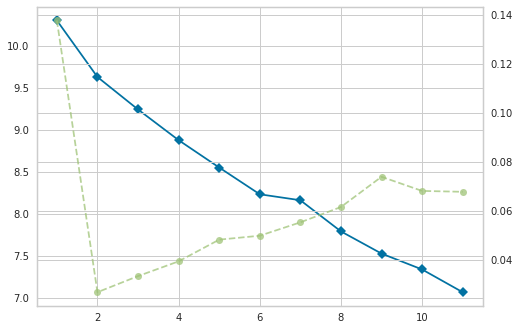

In [34]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), locate_elbow = True)
visualizer.fit(gardens_grouped_clustering)

In [35]:
gardens_grouped_clustering = x_grouped.drop('Neighborhood', 1)
# set number of clusters
kclusters = 8

#gardens_grouped_clustering = real_gardens.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gardens_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15] 

array([0, 0, 4, 4, 1, 1, 1, 0, 7, 4, 0, 4, 4, 0, 0], dtype=int32)

In [36]:
ggc = gardens_grouped.drop('Neighborhood',1)

kclusters = 8

km = KMeans(n_clusters=kclusters, random_state=0).fit(ggc)

km.labels_[0:15]

array([3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 1, 1, 5], dtype=int32)

In [37]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

gardens_merged = x_grouped

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
#gardens_merged = gardens_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

gardens_merged.head(15) # check the last columns!

,Neighborhood,Zoo Exhibit,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Ambler Arboretum,0.0,0.05,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.00,0.05,0.0,0.0,0.0,0.0,0.00,0.0
1,American College Arboretum,0.0,0.05,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2,Appleford/Parsons-Banks Arboretum,0.0,0.05,0.0,0.0,0.00,0.000000,0.0,0.05,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
3,Arboretum Villanova,0.0,0.05,0.0,0.0,0.00,0.000000,0.0,0.05,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
4,Arboretum at Penn State,0.0,0.05,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,0.00,0.0
5,Arboretum at Penn State Behrend,0.0,0.05,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.00,0.05,0.0,0.0,0.0,0.0,0.00,0.0
6,Arboretum at the Reading Public Museum,0.0,0.10,0.0,0.0,0.05,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
7,Arboretum of the Barnes Foundation,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.05,0.0
8,Arnold Arboretum,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
9,Awbury Arboretum,0.0,0.05,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0


In [38]:
xFrame.head()

,name,city,state,latitude,longitude
0,Bartlett Arboretum and Gardens,Stamford,Connecticut,41.072089,-73.544436
1,Connecticut College Arboretum,New London,Connecticut,41.331256,-72.096437
2,Dinosaur State Park and Arboretum,Rocky Hill,Connecticut,41.664822,-72.639259
3,Edgerton Park Conservancy,New Haven,Connecticut,41.298434,-72.931023
4,EEB Biodiversity Education & Research Greenhouses,Storrs,Connecticut,41.805814,-72.254236


In [39]:
gardens_merged.insert(0, 'Cluster Labels', kmeans.labels_)

In [40]:
gardens_merged.rename(columns={"Neighborhood" : "name"}, inplace = True)
gardens_merged.head()

,Cluster Labels,name,Zoo Exhibit,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,Ambler Arboretum,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,0.0
1,0,American College Arboretum,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,4,Appleford/Parsons-Banks Arboretum,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.05,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Arboretum Villanova,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.05,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Arboretum at Penn State,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
coFrame.head()

,name,city,state,latitude,longitude
0,Bartlett Arboretum and Gardens,Stamford,Connecticut,41.072089,-73.544436
1,Connecticut College Arboretum,New London,Connecticut,41.331256,-72.096437
2,Dinosaur State Park and Arboretum,Rocky Hill,Connecticut,41.664822,-72.639259
3,Edgerton Park Conservancy,New Haven,Connecticut,41.298434,-72.931023
4,EEB Biodiversity Education & Research Greenhouses,Storrs,Connecticut,41.805814,-72.254236


In [42]:
gardens_merged['Cluster Labels'].value_counts()

4    41
0    38
1    18
3    17
7     6
6     5
5     5
2     2
Name: Cluster Labels, dtype: int64

In [43]:
neighborhoods_venues_sorted = gardens_merged.join(xFrame.set_index('name'), on='name')

In [44]:
neighborhoods_venues_sorted.head(25)

,Cluster Labels,name,Zoo Exhibit,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,city,state,latitude,longitude
0,0,Ambler Arboretum,0.0,0.050000,0.0,0.0,0.00,0.000000,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,Ambler,Pennsylvania,40.154553,-75.221565
1,0,American College Arboretum,0.0,0.050000,0.0,0.0,0.00,0.000000,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,Bryn Mawr,Pennsylvania,40.019833,-75.304630
2,4,Appleford/Parsons-Banks Arboretum,0.0,0.050000,0.0,0.0,0.00,0.000000,0.0,0.05,...,0.0,0.0,0.00,0.0,0.00,0.00,Villanova,Pennsylvania,40.037332,-75.349077
3,4,Arboretum Villanova,0.0,0.050000,0.0,0.0,0.00,0.000000,0.0,0.05,...,0.0,0.0,0.00,0.0,0.00,0.00,Villanova,Pennsylvania,40.037332,-75.349077
4,1,Arboretum at Penn State,0.0,0.050000,0.0,0.0,0.00,0.000000,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,State College,Pennsylvania,40.794450,-77.861639
5,1,Arboretum at Penn State Behrend,0.0,0.050000,0.0,0.0,0.00,0.000000,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,Erie,Pennsylvania,42.129471,-80.085269
6,1,Arboretum at the Reading Public Museum,0.0,0.100000,0.0,0.0,0.05,0.000000,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,Reading,Pennsylvania,40.335345,-75.927949
7,0,Arboretum of the Barnes Foundation,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,...,0.0,0.0,0.00,0.0,0.05,0.00,Merion,Pennsylvania,39.997538,-75.251608
8,7,Arnold Arboretum,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,Boston,Massachusetts,42.360253,-71.058291
9,4,Awbury Arboretum,0.0,0.050000,0.0,0.0,0.00,0.000000,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,Philadelphia (East Germantown),Pennsylvania,40.037903,-75.174027


In [45]:
# create map
map_clusters = folium.Map(location=[42.36, -72.7129], zoom_start = 7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['latitude'], neighborhoods_venues_sorted['longitude'], neighborhoods_venues_sorted['name'], neighborhoods_venues_sorted['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    print(cluster, poi)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

0 Ambler Arboretum
0 American College Arboretum
4 Appleford/Parsons-Banks Arboretum
4 Arboretum Villanova
1 Arboretum at Penn State
1 Arboretum at Penn State Behrend
1 Arboretum at the Reading Public Museum
0 Arboretum of the Barnes Foundation
7 Arnold Arboretum
4 Awbury Arboretum
0 BVT
4 Babcock Arboretum
4 Bailey Arboretum
0 Bard College Arboretum
0 Bartlett Arboretum and Gardens
6 Bartram's Garden
4 Bayard Cutting Arboretum State Park
4 Bedrock Gardens
0 Berkshire Botanical Garden
3 Biblical Gardens of the First Congregational Church
4 Blithewold Mansion, Gardens and Arboretum
7 Boston Public Garden
4 Bowman's Hill Wildflower Preserve
4 Brandywine Wildflower and Native Plant Gardens
0 Brooklyn Botanic Garden
0 Bryn Mawr Campus Arboretum
0 Buffalo and Erie County Botanical Gardens
0 Carnegie Science Arboretum
6 Centennial Arboretum
4 Chanticleer Garden
5 Chatham University Arboretum
4 Clark Botanic Garden
0 Coastal Maine Botanical Gardens
3 Connecticut College Arboretum
0 Cornell Bot

In [46]:
tgti = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['name']=='BVT'].index[0]
tgtc = neighborhoods_venues_sorted.iloc[tgti]['Cluster Labels']

print('Most similar gardens and Arboreta are: \n')
zero = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == tgtc]
for nm in zero['name']:
  if nm != 'BVT':
    print(nm)

Most similar gardens and Arboreta are: 

Ambler Arboretum
American College Arboretum
Arboretum of the Barnes Foundation
Bard College Arboretum
Bartlett Arboretum and Gardens
Berkshire Botanical Garden
Brooklyn Botanic Garden
Bryn Mawr Campus Arboretum
Buffalo and Erie County Botanical Gardens
Carnegie Science Arboretum
Coastal Maine Botanical Gardens
Cornell Botanic Gardens
Dinosaur State Park and Arboretum
F.R. Newman Arboretum
Fay Hyland Botanical Plantation
Garden in the Woods
Hadwen Arboretum
Harkness Memorial State Park
Haverford College Arboretum
John P. Humes Japanese Stroll Garden
Longfellow Arboretum
Lyle E. Littlefield Ornamentals Trial Garden
Maud Gordon Holmes Arboretum
Merion Botanical Park
Morris Arboretum
Planting Fields Arboretum
Rhododendron State Park
Scott Arboretum
Staten Island Botanical Garden
The Botanic Garden of Smith College
The Case Estates
The Stevens–Coolidge Place
Vassar College Arboretum
Vermont Experimental Cold Hardy Cactus Garden
Welkinweir
Wilcox Park

In [47]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 2.0]

,Cluster Labels,name,Zoo Exhibit,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,city,state,latitude,longitude
65,2,Holtwood Arboretum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Holtwood,Pennsylvania,39.832047,-76.327459
130,2,Wild Gardens of Acadia,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Mount Desert Island,Maine,44.333014,-68.240798
